In [36]:
%matplotlib inline

import os
import yaml
import numpy as np
import sys
import cv2 
from matplotlib import pyplot as plt

# add spartan to PYTHONPATH
def addSpartanToPythonPath():
    sys.path.append("/home/manuelli/spartan/modules")
    
addSpartanToPythonPath()
import spartan.utils.utils as spartanUtils

In [64]:
data_folder = "20171206-232444"
cwd = os.getcwd()
data_folder_fullpath = os.path.join(cwd, data_folder)

def getFullFilename(partialFilename):
    return os.path.join(data_folder_fullpath, partialFilename)
    
data_file = getFullFilename("data.yaml")

data = spartanUtils.getDictFromYamlFilename(data_file)


In [65]:
# load images
imageDict = dict()
backgroundImgFilename = getFullFilename(data['images']['scan_top']['background']['rgb']['filename'])
foregroundImgFilename = getFullFilename(data['images']['scan_top']['foreground']['rgb']['filename'])



# opencv is in BGR format
background_img = cv2.imread(backgroundImgFilename, cv2.IMREAD_COLOR)
foreground_img = cv2.imread(foregroundImgFilename, cv2.IMREAD_COLOR)
# cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# print type(img)
# print type(cv_rgb)
# print np.shape(cv_rgb)

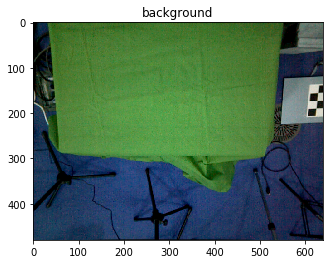

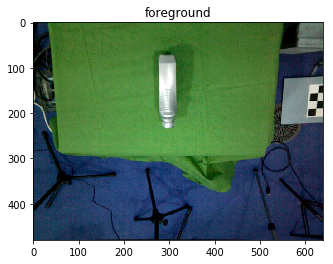

In [67]:
plt.imshow(background_img)
plt.title("background")
plt.show()

plt.imshow(foreground_img)
plt.title("foreground")
plt.show()

In [59]:
b,g,r = cv2.split(img)
print b.shape

(480, 640)
